In [2]:
import numpy
from scipy.optimize import minimize
import matplotlib.pyplot as plt

In [3]:
# define a polynomial
def polynomial(x, arr):
    v = 0
    for i in range(0, len(arr)):
        v += arr[i]* (x**i)
    return v

Example polynomial: 
$$f(x) = x^7-1$$
Let's try to evaluate that on -2.

In [4]:
print(polynomial(-2, [-1,0,0,0,0,0,0,1]))
print(polynomial(2, [-1,0,0,0,0,0,0,1]))

-129
127


In [5]:
# expected data
data = [[-5,69.1], [-4, 5.3], [-3,72.0], [-2,9.6], [-1,-10.6], [0,31.6], [1,26.8],[2,-20.1],[3,-0.5],[4,-66.3]]
data

[[-5, 69.1],
 [-4, 5.3],
 [-3, 72.0],
 [-2, 9.6],
 [-1, -10.6],
 [0, 31.6],
 [1, 26.8],
 [2, -20.1],
 [3, -0.5],
 [4, -66.3]]

To do OLS, we sum the square of the distances:
$$ error = \sum_{i=0}^k (polynomial(x_i)-y_i)^2$$

and for ridge

$$ error = \sum_{i=0}^k (polynomial(x_i)-y_i)^2 + \lambda\cdot \sum_{i=0}^n a_i^2$$

and for lasso

$$ error = \sum_{i=0}^k (polynomial(x_i)-y_i)^2 + \lambda\cdot\sum_{i=0}^n |a_i|$$


In [6]:
# the error function which we want to minimize: least square
def errorfun(arr):
    s = 0
    for i in range(0,len(data)):
        s += (polynomial(data[i][0], arr) - data[i][1])**2
    return s

l = 5

def errorfunRidge(arr):
    s = 0
    for i in range(0,len(data)):
        s += (polynomial(data[i][0], arr) - data[i][1])**2
    for i in range(0,len(arr)):
        s += l*(arr[i]**2)
    return s

def errorfunLasso(arr):
    s = 0
    for i in range(0,len(data)):
        s += (polynomial(data[i][0], arr) - data[i][1])**2
    for i in range(0,len(arr)):
        s += l*(abs(arr[i]))
    return s

In [7]:
minim = minimize(errorfun, [1,1,1,1,1,1,1,1,1,1,1])
minim.x

array([ 2.15297326e+03, -3.19800384e+05, -6.23584117e+04,  4.67549522e+05,
        9.21297235e+04, -1.56676784e+05, -3.10979341e+04,  1.72574133e+04,
        3.43720807e+03, -5.75837701e+02, -1.14892415e+02])

this makes us the OLS regression to be aproximately:
$$ 2152 -319800x  -62358x^2  +467549 x^3  +92129 x^4 -156676 x^5  -31097 x^6 + 17257 x^7    + 3437 x^8    -575 x^9    -114x^{10}$$

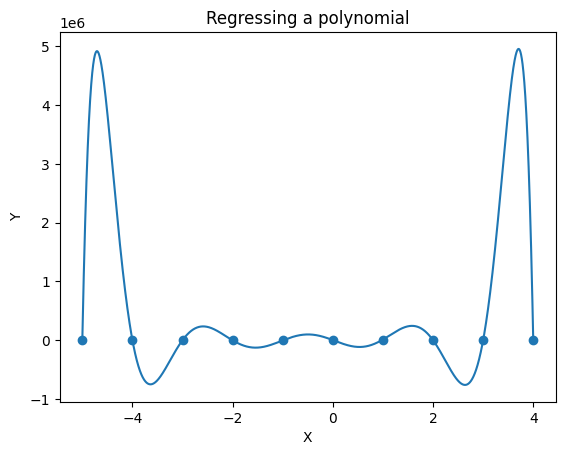

In [8]:
linspace = numpy.linspace(-5,4, 10000)
plt.scatter(list(map(lambda x: x[0], data)), list(map(lambda x: x[1], data)), label='Data')
plt.plot(linspace, list(map(lambda x: polynomial(x, minim.x), linspace)), label='Regressed polynomial')
plt.xlabel('X'); plt.ylabel('Y'); plt.title('Regressing a polynomial')
plt.show()

In [13]:
l = 10
minim = minimize(errorfunRidge, [1,1,1,1,1,1,1,1,1,1,1])
minim.x = minim.x.astype(int)
minim.x

array([ 0,  2,  3, 12,  2, -9, -1,  1,  0,  0,  0])

$$ f(x) = 3 + 15 x -2 x^2 -40x^3+ 13x^4 -23x^5 -5x^6 +3x^7$$

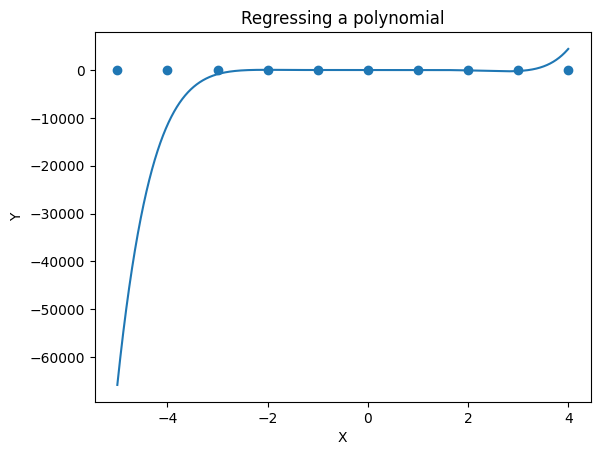

In [14]:
linspace = numpy.linspace(-5,4, 10000)
plt.scatter(list(map(lambda x: x[0], data)), list(map(lambda x: x[1], data)), label='Data')
plt.plot(linspace, list(map(lambda x: polynomial(x, minim.x), linspace)), label='Regressed polynomial')
plt.xlabel('X'); plt.ylabel('Y'); plt.title('Regressing a polynomial')
plt.show()

In [15]:
minim = minimize(errorfunLasso, [1,1,1,1,1,1,1,1,1,1,1])
minim.x = minim.x.astype(int)
minim.x

array([   68, -3078,  -668,  4557,   933, -1539,  -311,   170,    34,
          -5,    -1])

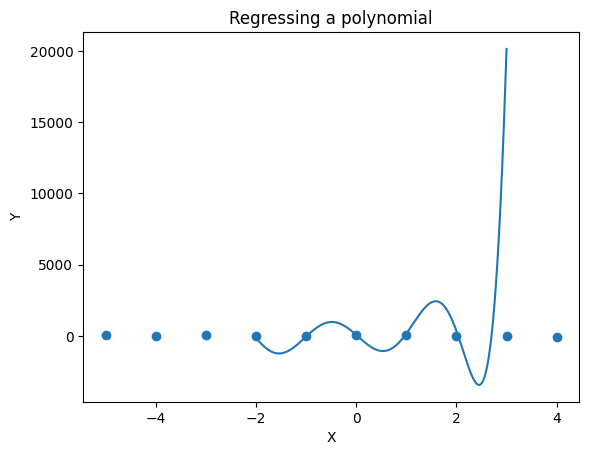

In [16]:
linspace = numpy.linspace(-2,3, 10000)
plt.scatter(list(map(lambda x: x[0], data)), list(map(lambda x: x[1], data)), label='Data')
plt.plot(linspace, list(map(lambda x: polynomial(x, minim.x), linspace)), label='Regressed polynomial')
plt.xlabel('X'); plt.ylabel('Y'); plt.title('Regressing a polynomial')
plt.show()